In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

In [2]:
df_main = pl.read_csv("foxes.csv")

In [3]:
df_fox = df_main[df_main['alive'] == 'fox-alive']
df_rabbit = df_main[df_main['alive'] == 'rabbit-alive']

In [4]:
f_fox = (
    df_fox.with_column((pl.col("frame")// 60).alias("frame_blocks"))
    .groupby(["alive","frame_blocks"])
    .agg((pl.count("alive")// 60).alias("fox"))
    .sort(["frame_blocks","fox"])
)
f_rabbit = (
    df_rabbit.with_column((pl.col("frame")// 60).alias("frame_blocks"))
    .groupby(["alive","frame_blocks"])
    .agg((pl.count("alive")// 60).alias("rabbit"))
    .sort(["frame_blocks","rabbit"])
)

In [5]:
# df_main = pl.read_csv("df_both_intelligent1.csv")
# f_fox = df_main
# f_rabbit = df_main

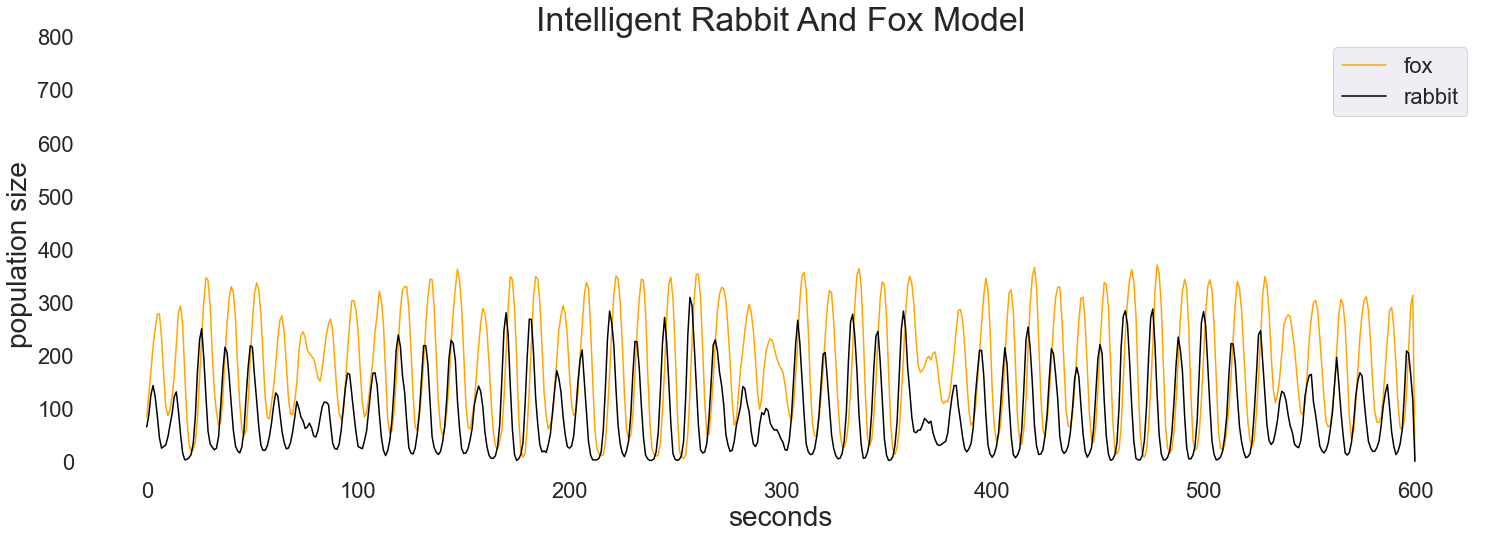

In [5]:
sns.set(font_scale = 2)
plt.subplots(figsize=(25,8))
plot = sns.lineplot(data=f_fox['fox'], color = 'orange')
plot = sns.lineplot(data=f_rabbit['rabbit'], color = 'black')
plt.xticks([0,100,200,300,400,500,600])
plt.yticks([0,100,200,300,400,500,600,700,800])
plt.xlabel("seconds", fontsize = 28)
plt.ylabel("population size", fontsize = 28)
plt.title('Intelligent Rabbit And Fox Model', fontsize = 34)
plot.set_facecolor('white')
plt.legend(labels=["fox","rabbit"])

In [6]:
# f_fox['rabbit'] = f_rabbit['rabbit']
# df = f_fox[['fox','rabbit','frame_blocks']]
# df.write_csv("df_fox_intelligent1.csv")

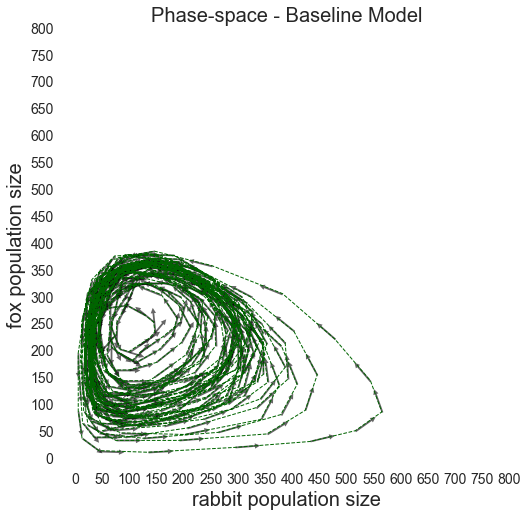

In [8]:
df_collective = pl.read_csv("df_baseline1.csv")
df_collective = df_collective.to_pandas()
plt.subplots(figsize=(8,8))

plt.plot(df_collective['rabbit'],df_collective['fox'],color='darkgreen', linewidth=1, linestyle='--')
for i in range (len(df_collective['rabbit'])-1):
    X = df_collective['rabbit'][i]
    Y = df_collective['fox'][i]
    U = df_collective['rabbit'][i+1]-df_collective['rabbit'][i]
    V = df_collective['fox'][i+1]-df_collective['fox'][i]
    plt.quiver(X, Y, U, V, color='black', width=0.004, headwidth=3, headlength=3, headaxislength=3, minshaft=0.5, minlength=0.5, alpha=0.6)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])
plt.xlabel("rabbit population size", fontsize = 20)
plt.ylabel("fox population size", fontsize = 20)
plt.title('Phase-space - Baseline Model', fontsize = 20)
ax = plt.gca()
ax.set_facecolor('white')
plt.show()


In [15]:
df_baseline= pl.read_csv("df_baseline1.csv")
df_collective = pl.read_csv("df_both_intelligent1.csv")

fox_base = df_baseline['fox']
rabbit_base = df_baseline['rabbit']
fox_collective = df_collective['fox']
rabbit_collective = df_collective['rabbit']


fox_base = fox_base.to_pandas()
rabbit_base = rabbit_base.to_pandas()
fox_collective = fox_collective.to_pandas()
rabbit_collective = rabbit_collective.to_pandas()

from scipy.stats import ks_2samp

difference_baseline = rabbit_base-fox_base
difference_collective = rabbit_collective-fox_collective

# compare samples
stat, p = ks_2samp(difference_baseline, difference_collective, alternative ='greater')

print('Statistics={}, p={}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.627287853577371, p=2.0354580544776576e-111
Different distribution (reject H0)


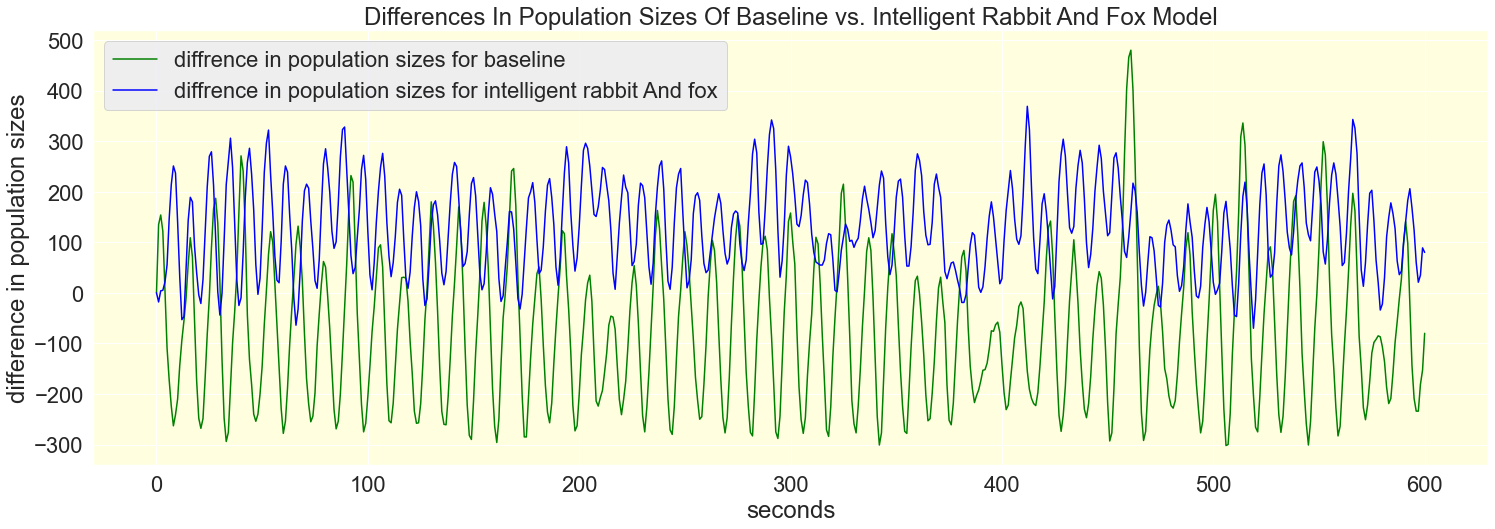

In [19]:
sns.set(font_scale = 2)
plt.subplots(figsize=(25,8))
plot = sns.lineplot(data=difference_baseline, color = 'green')
plot = sns.lineplot(data=difference_collective, color = 'blue')
plot.set_xlabel("seconds")
plot.set_ylabel("difference in population sizes")
plot.set(title='Differences In Population Sizes Of Baseline vs. Intelligent Rabbit And Fox Model')
plot.set_facecolor('lightyellow')
plt.yticks([-300,-200,-100,0,100,200,300,400,500])
plt.legend(labels=["diffrence in population sizes for baseline","diffrence in population sizes for intelligent rabbit And fox"])